<h1><center>Tuỳ chỉnh bảng phân tích số liệu đơn giản với câu lệnh Table2 </center></h1>

Stata amateur <br>
Ngày 05 tháng 08 năm 2021

Có những khoá học để cá nhân hoá báo cáo phân tích số liệu cung cấp bởi Stata với giá mỗi lớp có thể lên đến > 1.000 USD. Tất nhiên, những khoá học này sẽ cung cấp góc nhìn toàn diện từ cơ bản đến nâng cao. Tuy nhiên, do chi phí cao và rào cản về ngôn ngữ mà những khoá học như vậy khó được tiếp cận ở Việt Nam.

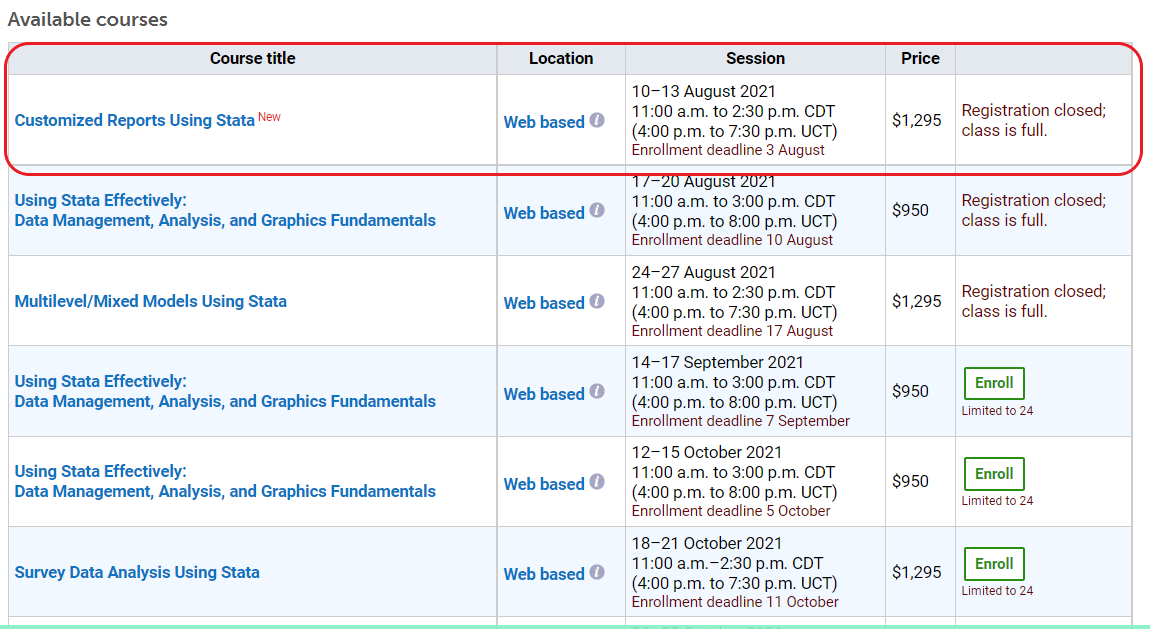

Bài viết này tôi sẽ trình bày một cách đơn giản để có 1 bảng số liệu cho báo cáo phân tích bằng cách xuất bảng kết quả dưới dạng file excel.
Đối với Statalist đã có kinh nghiệm làm việc với Stata chắc hẳn đã biết đến câu lệnh <b>table1</b> của tác giả <i>Phil Clayton</i>.

## Ví dụ sử dụng table1 với bộ số liệu auto

In [1]:
set linesize 120

In [2]:
sysuse auto, clear

la de foreign 0 "Nội địa" 1 "Nhập khẩu" // Việt hoá label cho biến foreign
la val foreign foreign

table1, by(foreign) vars(price conts \ weight contn \ rep78 cat) format(%2.1f) one


(1978 Automobile Data)



  +----------------------------------------------------------------------------------------+
  | Factor                     Nội địa                   Nhập khẩu                 p-value |
  |----------------------------------------------------------------------------------------|
  | N                          52                        22                                |
  |----------------------------------------------------------------------------------------|
  | Price, median (IQR)        4782.5 (4184.0, 6234.0)   5759.0 (4499.0, 7140.0)      0.30 |
  |----------------------------------------------------------------------------------------|
  | Weight (lbs.), mean (SD)   3317.1 (695.4)            2315.9 (433.0)             <0.001 |
  |----------------------------------------------------------------------------------------|
  | Repair Record 1978                                                              <0.001 |
  |    1                       2 (4%)      

Chúng ta có thể tìm hiểu thêm về câu lệnh <b>table1</b> bằng cách gõ câu lệnh <b>help table1 </b><br>
Với các thông tin như trên chúng ta đã có 1 bảng số liệu cơ bản cho báo cáo. Với lệnh <b>table1</b> chúng ta có thể xuất bảng trên ra excel một cách dễ dàng

In [3]:
table1, by(foreign) vars(price conts \ weight contn \ rep78 cat) format(%2.1f) one ///
saving(ketqua_phantich.xlsx, sheet(Bang1, replace) keepcellfmt)

  +----------------------------------------------------------------------------------------+
  | Factor                     Nội địa                   Nhập khẩu                 p-value |
  |----------------------------------------------------------------------------------------|
  | N                          52                        22                                |
  |----------------------------------------------------------------------------------------|
  | Price, median (IQR)        4782.5 (4184.0, 6234.0)   5759.0 (4499.0, 7140.0)      0.30 |
  |----------------------------------------------------------------------------------------|
  | Weight (lbs.), mean (SD)   3317.1 (695.4)            2315.9 (433.0)             <0.001 |
  |----------------------------------------------------------------------------------------|
  | Repair Record 1978                                                              <0.001 |
  |    1                       2 (4%)                    0 (0%)       

Cứ tuần tự như vậy, chúng ta sẽ có những bảng báo cáo cơ bản. Tuy nhiên, làm thế nào để cá nhân hoá bảng kết quả khi các giá trị trong bảng được mặc định sẵn bởi 1 tác giả người nước ngoài.

## Giới thiệu câu lệnh table2

Bằng cách áp dụng và chỉnh sửa một số đoạn codes trong chương trình của <b>table1</b>, tôi đã xây dựng câu lệnh <b>table2</b>. Chương trình tôi bổ sung sẽ cá nhân hoá hơn bởi 2 ý sau đây:

- Chuyển tên các nhãn sang tiếng Việt
- Chia mỗi nhóm làm 2 cột, cột tần số và cột tỷ lệ

Câu lệnh table2 có thể tải được tại: https://github.com/dhcvn/UseStata/blob/master/table2.ado
Đây là câu lệnh dạng ado file. Chúng ta sẽ tải về và lưu vào folder ado file và sử dụng như những câu lệnh khác.

In [4]:
// Nếu chưa biết thư mục chứa ado file của Stata chúng ta có thể gõ lệnh:
adopath
* thường thì tôi sẽ add adofile vào ado\plus

  [1]  (BASE)      "C:\Program Files (x86)\Stata15\ado\base/"
  [2]  (SITE)      "C:\Program Files (x86)\Stata15\ado\site/"
  [3]              "."
  [4]  (PERSONAL)  "c:\ado\personal/"
  [5]  (PLUS)      "c:\ado\plus/"
  [6]  (OLDPLACE)  "c:\ado/"
  [7]              "C:\Users\DELL\AppData\Local\Programs\Python\Python37\Lib\site-packages\stata_kernel\ado"


In [5]:
gen price2 = price / 1000 // Đổi về đơn vị hàng nghìn
gen weight2 = weight / (0.453592 * 1000)
table2, by(foreign) vars(price2 conts \weight2 contn \ rep78 cat) format(%2.1f) one




  +-------------------------------------------------------------------------------------------------+
  | Đặc điểm                    Nội địa                      Nhập khẩu                    Giá trị p |
  |                             Tần số           Tỷ lệ (%)   Tần số           Tỷ lệ (%)             |
  |-------------------------------------------------------------------------------------------------|
  | N                           52               100         22               100                   |
  |-------------------------------------------------------------------------------------------------|
  | price2, Trung vị (IQR)      4.8 (4.2, 6.2)               5.8 (4.5, 7.1)                    0.30 |
  |-------------------------------------------------------------------------------------------------|
  | weight2, Trung bình (ĐLC)   7.3 (1.5)                    5.1 (1.0)                       <0.001 |
  |----------------------------------------------------------------------------

Câu lệnh này cũng sẽ có thể xuất file ra excel giống như câu lệnh trên.
Để chỉnh sửa 1 câu lệnh sẵn có nào của Stata hãy tìm đến thư mục chứa chúng và xem bên trong chúng có những thuật toán và code như thế nào.

In [6]:
// Gõ lệnh
which table1

c:\ado\plus\t\table1.ado
*! -table1- version 1.3 Phil Clayton    2014-10-15


In [ ]:
// Khi đã biết như mục chứa câu lệnh, chúng ta có thể chỉnh sửa ado file bằng cách gõ lệnh sau đây
doedit "c:\ado\plus\t\table1.ado"

<h2 style="line-height:130%"> Chúng ta cũng có thể áp dụng cách này để chỉnh sửa các câu lệnh sẵn có của Stata để có những câu lệnh tuỳ biến theo mong muốn của bản thân. Cách này yêu cầu chúng ta cần có một chút kinh nghiệm về coding trong Stata và một sự tìm tòi, nhưng kết quả sẽ khiến bản thân hài lòng cũng như có thể giúp cho công việc cải thiện rất nhiều về sau.</h2>